In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Load Data

In [2]:
filepath = 'HousingData.csv'
dataname = 'BostonHousing'

In [3]:
df = pd.read_csv(filepath)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
# data_link = 'https://www.kaggle.com/datasets/altavish/boston-housing-dataset'
# print("|[{}]({})| {} | {} | mixed|".format(dataname, data_link, len(df), len(df.columns[:-1])))

In [5]:
heat_corr=df.corr()
heat_corr['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.373136
B          0.333461
DIS        0.249929
CHAS       0.181391
RAD       -0.381626
CRIM      -0.391363
AGE       -0.394656
NOX       -0.427321
TAX       -0.468536
INDUS     -0.481772
PTRATIO   -0.507787
LSTAT     -0.735822
Name: MEDV, dtype: float64

In [6]:
info_filepath = dataname+'.info'
with open(info_filepath, 'w') as f:
    for col in df.columns[:-1]:
        if len(df[col].unique()) <= 10:
            print(col, df[col].unique())
            f.write(col + ' discrete\n')
        else:
            f.write(col + ' continuous\n')
    f.write(df.columns[-1] + ' continuous\n')  # consider target value as continuous variable
    f.write('LABEL_POS -1')

CHAS [ 0. nan  1.]
RAD [ 1  2  3  5  4  8  6  7 24]


In [7]:
df.to_csv(dataname+'.data', index=False, header=False)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [9]:
df.iloc[:, -1].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

# Data Analysis

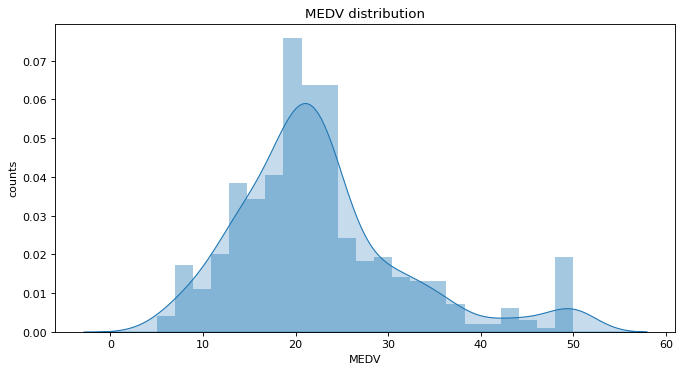

In [10]:
# y label distribution
plt.figure(num = None, figsize = (10,5), dpi = 80, facecolor = 'w', edgecolor = 'k')
sns.distplot(df.iloc[:, -1], hist=True, kde_kws={"shade": True})
plt.ylabel('counts')
plt.title(f'{df.columns[-1]} distribution')
plt.savefig('figs/'+dataname+'_label_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

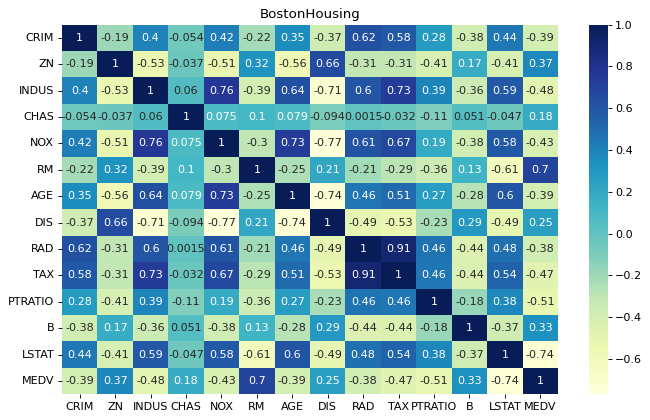

In [11]:
# corr heatmap
plt.figure(num = None, figsize = (10,6), dpi = 80, facecolor = 'w', edgecolor = 'k')
heat_corr=df.corr()
sns.heatmap(heat_corr, annot=True, cmap='YlGnBu')
plt.title(f'{dataname}')
plt.savefig('figs/'+dataname+'_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

columnNames ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
remain_cols ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


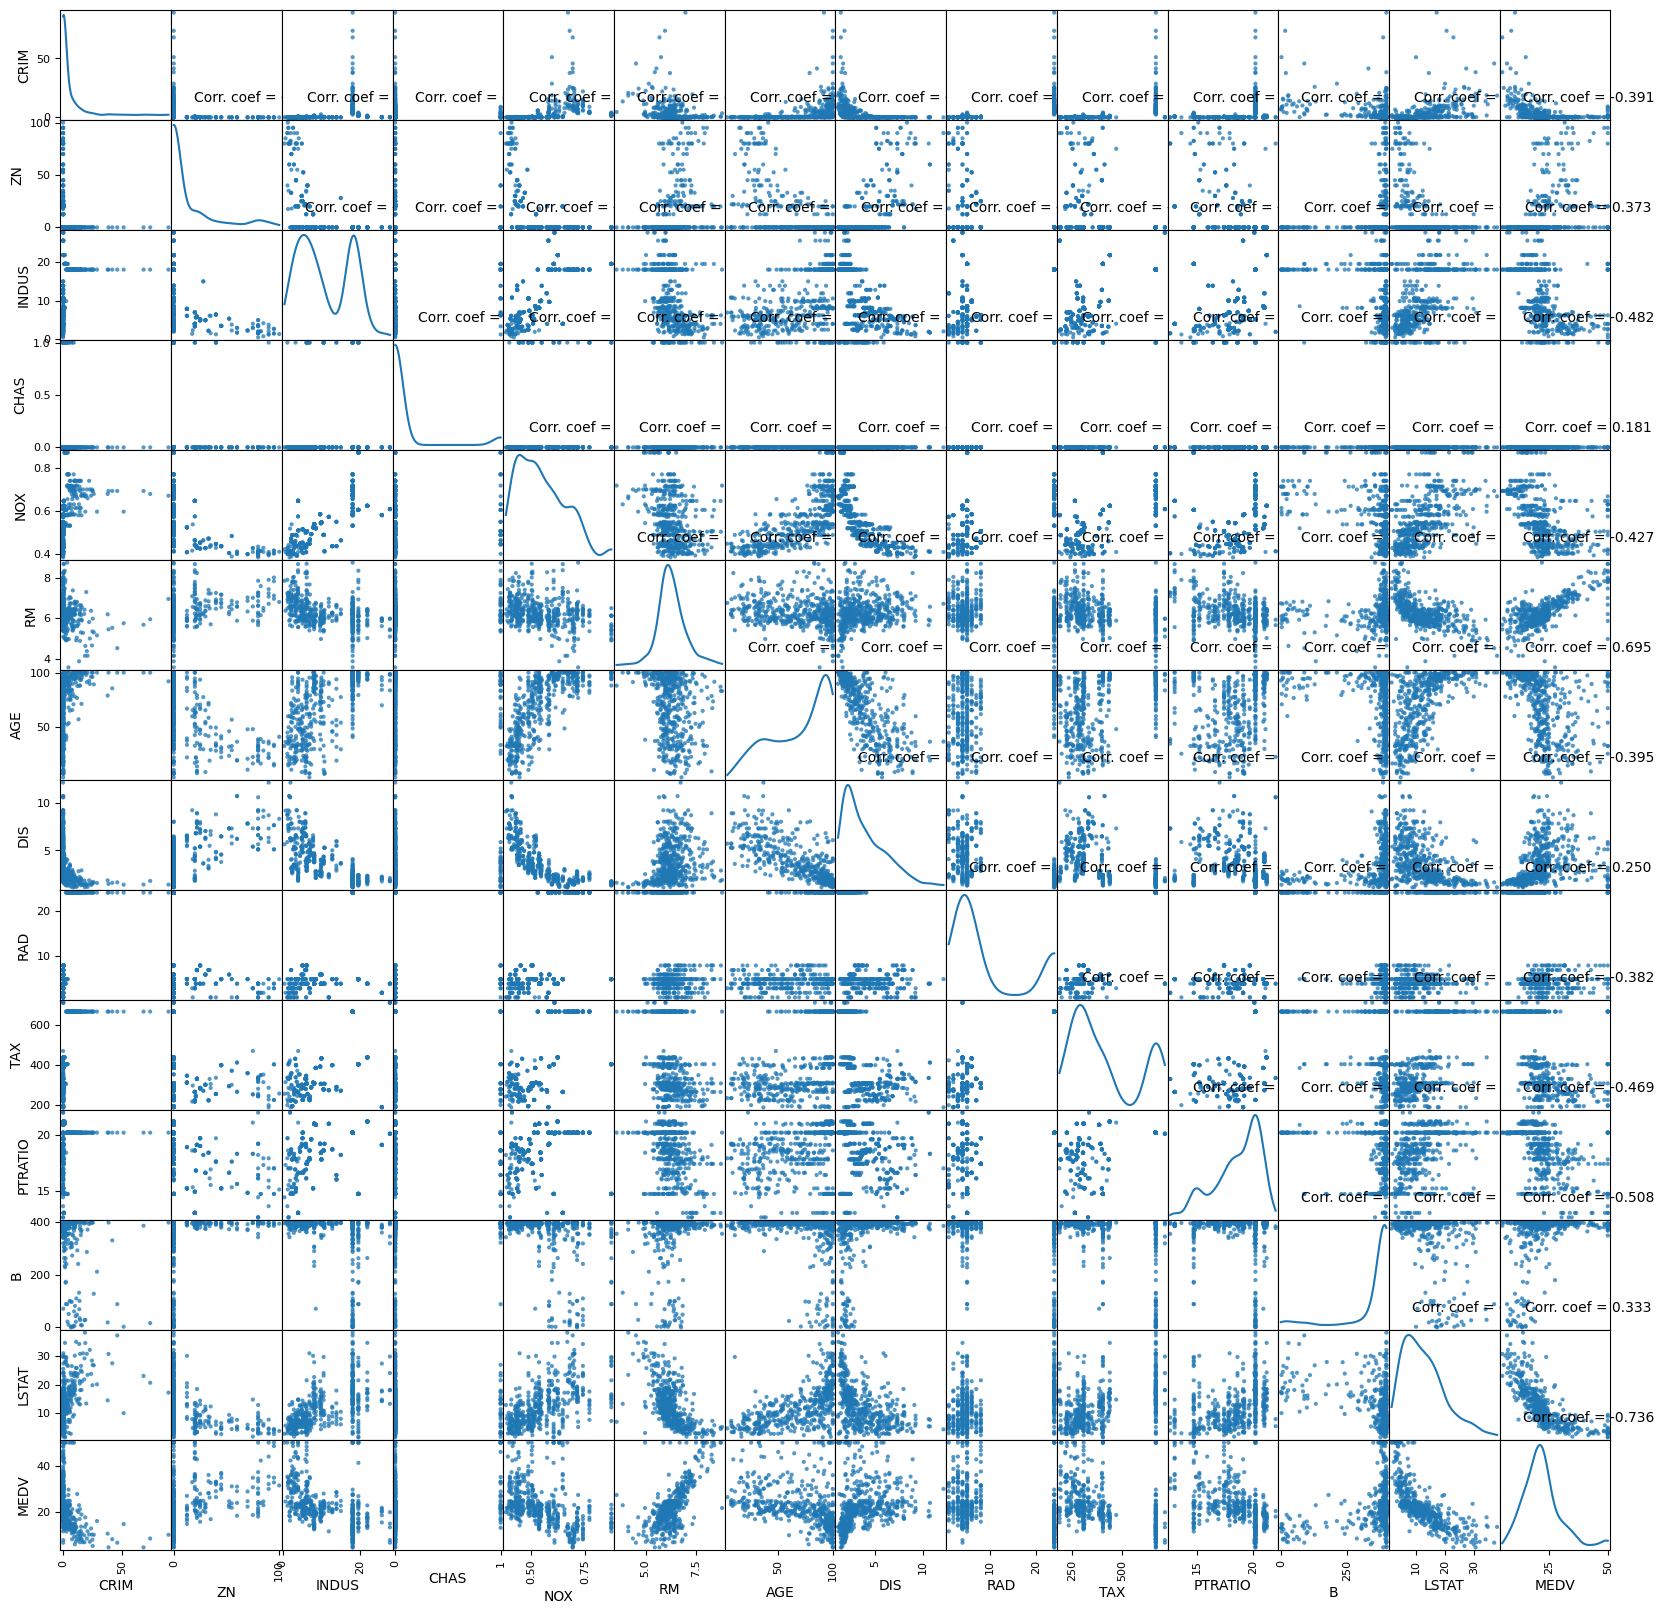

In [12]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    # df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    # df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    # if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
    #     columnNames = columnNames[:10]
    print("columnNames", columnNames)
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    drop_cols = []
    remain_cols = []
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
        if columnNames[j]==columnNames[-1] and (corrs[i, j] < -0.1 or corrs[i, j] > 0.1):
            # print(columnNames[i], " & ", columnNames[j], " ", corrs[i, j])
            remain_cols.append(columnNames[i])
    plt.savefig('figs/'+dataname+'_pair_plot.png', dpi=300, bbox_inches='tight')
    print("remain_cols", remain_cols)
    # plt.suptitle('Scatter and Density Plot')
    plt.show()
plotScatterMatrix(df, 20, 10)